# EDA cz. 2

# Do usunięcia vvvvvvvvvvvvvvvvvvvvvvvvvv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sklearn 
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
np.random.seed = 42

In [2]:
df_original = pd.read_csv('star_classification.csv')
df = df_original.copy()

df = df.loc[:, df.columns != 'rerun_ID']
df = df[df['u'] > 0]

df_correlation = df.loc[:, df.columns != 'class'].corr()
df_correlation_GALAXY = df[df['class']=='GALAXY'].loc[:, df.columns != 'class'].corr()
df_correlation_QSO = df[df['class']=='QSO'].loc[:, df.columns != 'class'].corr()
df_correlation_STAR = df[df['class']=='STAR'].loc[:, df.columns != 'class'].corr()

In [3]:
#one-hot for class
# df['is'] = df['class']
# df = pd.get_dummies(df, columns = ['is'], dtype=float)
# df.head()

# Do usunięcia ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [4]:
point_limit=100000 # ramka danych ma 100000 obserwacji, kolekcje wykresów punktowych się długo rysują przy tej liczbie

def standard_distribution_info(variable_name):
    fig, ax = plt.subplots(4, 1, figsize=(10, 10))
    sns.histplot(data=df, x=variable_name, color='#17becf', ax=ax[0]).set(title='All classes')
    sns.histplot(data=df[df['class']=='GALAXY'], x=variable_name, color='#1f77b4', ax=ax[1]).set(title='GALAXY')
    sns.histplot(data=df[df['class']=='QSO'], x=variable_name, color='#ff7f0e', ax=ax[2]).set(title='QSO')
    sns.histplot(data=df[df['class']=='STAR'], x=variable_name, color='#2ca02c', ax=ax[3]).set(title='STAR')
    fig.tight_layout(pad=5.0)
    fig.show()

def standard_boxplot_info(variable_name):
    fig, ax = plt.subplots(4, 1, figsize=(10, 10))
    sns.boxplot(data=df, x=variable_name, color='#17becf', ax=ax[0]).set(title='All classes')
    sns.boxplot(data=df[df['class']=='GALAXY'], x=variable_name, color='#1f77b4', ax=ax[1]).set(title='GALAXY')
    sns.boxplot(data=df[df['class']=='QSO'], x=variable_name, color='#ff7f0e', ax=ax[2]).set(title='QSO')
    sns.boxplot(data=df[df['class']=='STAR'], x=variable_name, color='#2ca02c', ax=ax[3]).set(title='STAR')
    fig.tight_layout(pad=5.0)
    fig.show()
    boxplot_info(variable_name)
    
def boxplot_info(variable_name):
    # outliery są znajdywane za pomocą metody 1.5IQR
    print('All classes:')
    selected_df = df[variable_name]
    print('mediana = %s' %np.median(selected_df))
    print('średnia = %s' %np.mean(selected_df))
    Q1 = np.percentile(selected_df, 25)
    Q3 = np.percentile(selected_df, 75)
    IQR = Q3-Q1
    print('Q1 = %s' %Q1,'Q3 = %s' %Q3)
    print('outlier_lower_bound = %s' %(Q1-(1.5*IQR)))
    print('outlier_upper_bound = %s' %(Q3+(1.5*IQR)))
    print('outlier_count = %s' %selected_df[(selected_df < Q1-(1.5*IQR)) | (selected_df > Q3+(1.5*IQR))].count())
    print('GALAXY:')
    selected_df = df[df['class']=='GALAXY'][variable_name]
    print('mediana = %s' %np.median(selected_df))
    print('średnia = %s' %np.mean(selected_df))
    Q1 = np.percentile(selected_df, 25)
    Q3 = np.percentile(selected_df, 75)
    IQR = Q3-Q1
    print('Q1 = %s' %Q1,'Q3 = %s' %Q3)
    print('outlier_lower_bound = %s' %(Q1-(1.5*IQR)))
    print('outlier_upper_bound = %s' %(Q3+(1.5*IQR)))
    print('outlier_count = %s' %selected_df[(selected_df < Q1-(1.5*IQR)) | (selected_df > Q3+(1.5*IQR))].count())
    print('QSO:')
    selected_df = df[df['class']=='QSO'][variable_name]
    print('mediana = %s' %np.median(selected_df))
    print('średnia = %s' %np.mean(selected_df))
    Q1 = np.percentile(selected_df, 25)
    Q3 = np.percentile(selected_df, 75)
    IQR = Q3-Q1
    print('Q1 = %s' %Q1,'Q3 = %s' %Q3)
    print('outlier_lower_bound = %s' %(Q1-(1.5*IQR)))
    print('outlier_upper_bound = %s' %(Q3+(1.5*IQR)))
    print('outlier_count = %s' %selected_df[(selected_df < Q1-(1.5*IQR)) | (selected_df > Q3+(1.5*IQR))].count())
    print('STAR:')
    selected_df = df[df['class']=='STAR'][variable_name]
    print('mediana = %s' %np.median(selected_df))
    print('średnia = %s' %np.mean(selected_df))
    Q1 = np.percentile(selected_df, 25)
    Q3 = np.percentile(selected_df, 75)
    IQR = Q3-Q1
    print('Q1 = %s' %Q1,'Q3 = %s' %Q3)
    print('outlier_lower_bound = %s' %(Q1-(1.5*IQR)))
    print('outlier_upper_bound = %s' %(Q3+(1.5*IQR)))
    print('outlier_count = %s' %selected_df[(selected_df < Q1-(1.5*IQR)) | (selected_df > Q3+(1.5*IQR))].count())
    
def standard_correlation_visualisation(variable_name, limit):
    sns.pairplot(df.head(limit), y_vars=variable_name, x_vars=df.columns.values[:5], hue='class')
    sns.pairplot(df.head(limit), y_vars=variable_name, x_vars=df.columns.values[5:10], hue='class')
    sns.pairplot(df.head(limit), y_vars=variable_name, x_vars=df.columns.values[10:15], hue='class')
    sns.pairplot(df.head(limit), y_vars=variable_name, x_vars=df.columns.values[15:18], hue='class')
    plt.show()
    fig, ax = plt.subplots(2, 2, figsize=(10, 10))
    df_correlation[variable_name].plot.bar(color='#17becf', ylim=(-1, 1), ax=ax[0, 0]).set(title='All classes correlations') 
    df_correlation_GALAXY[variable_name].plot.bar(color='#1f77b4', ylim=(-1, 1), ax=ax[0, 1]).set(title='GALAXY correlations')
    df_correlation_QSO[variable_name].plot.bar(color='#ff7f0e', ylim=(-1, 1), ax=ax[1, 0]).set(title='QSO correlations')
    df_correlation_STAR[variable_name].plot.bar(color='#2ca02c', ylim=(-1, 1), ax=ax[1, 1]).set(title='STAR correlations')
    ax[0, 0].axhline(y = 0, color = 'black', linewidth = 0.5, linestyle = '-')
    ax[0, 1].axhline(y = 0, color = 'black', linewidth = 0.5, linestyle = '-') 
    ax[1, 0].axhline(y = 0, color = 'black', linewidth = 0.5, linestyle = '-')
    ax[1, 1].axhline(y = 0, color = 'black', linewidth = 0.5, linestyle = '-') 
    fig.tight_layout(pad=5.0)
    fig.show()
    print('korelacja:')
    print('all_classes: \n%s' %df_correlation.sort_values(by=[variable_name], ascending=False)[variable_name])
    print('GALAXY: \n%s' %df_correlation_GALAXY.sort_values(by=[variable_name], ascending=False)[variable_name])
    print('QSO: \n%s' %df_correlation_QSO.sort_values(by=[variable_name], ascending=False)[variable_name])
    print('STAR: \n%s' %df_correlation_STAR.sort_values(by=[variable_name], ascending=False)[variable_name])

# cam_col
 Camera column to identify the scanline within the run
 
 Jest to zmienna o wartościach dyskretnych.
 Jej rozkład jest podobny dla każdej z klas; wartości brzegowe są rzadsze.
 Nie widać wyraźnego związku 'cam_col' z żadną z pozostałych zmiennych.

cam_col
4    19573
3    18851
5    18537
2    17116
1    13227
6    12695
Name: count, dtype: int64

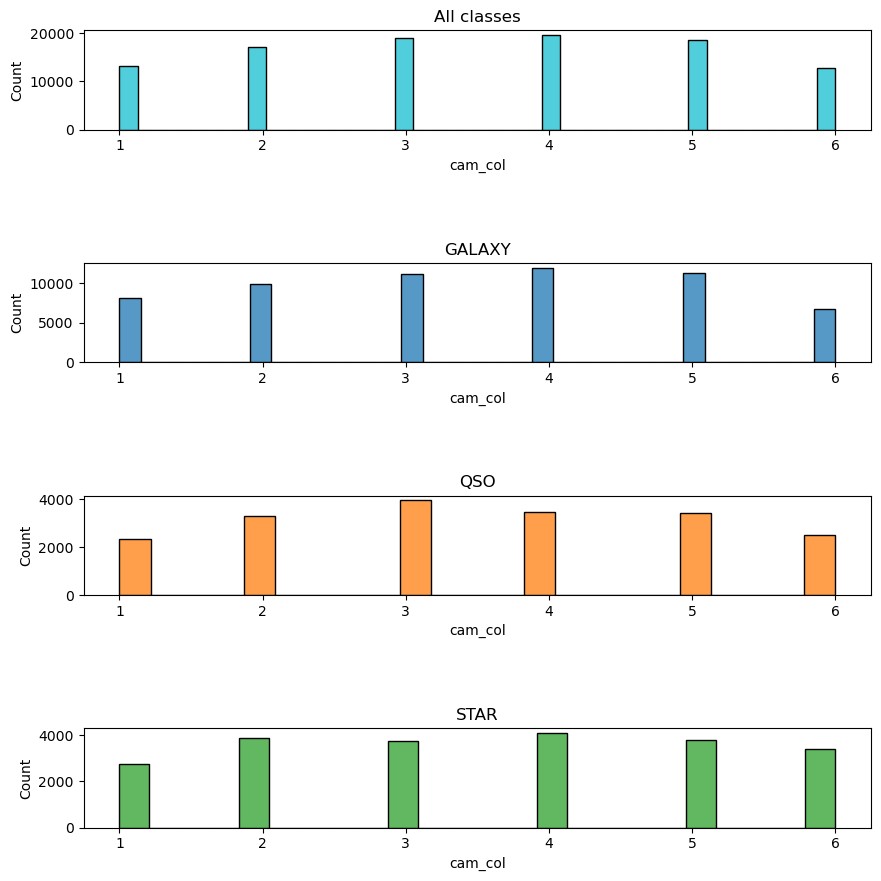

In [5]:
standard_distribution_info('cam_col')
df['cam_col'].value_counts()

All classes:
mediana = 4.0
średnia = 3.5116251162511625
Q1 = 2.0 Q3 = 5.0
outlier_lower_bound = -2.5
outlier_upper_bound = 9.5
outlier_count = 0
GALAXY:
mediana = 4.0
średnia = 3.4846496761712507
Q1 = 2.0 Q3 = 5.0
outlier_lower_bound = -2.5
outlier_upper_bound = 9.5
outlier_count = 0
QSO:
mediana = 3.0
średnia = 3.5224935393702865
Q1 = 2.0 Q3 = 5.0
outlier_lower_bound = -2.5
outlier_upper_bound = 9.5
outlier_count = 0
STAR:
mediana = 4.0
średnia = 3.5763441856157088
Q1 = 2.0 Q3 = 5.0
outlier_lower_bound = -2.5
outlier_upper_bound = 9.5
outlier_count = 0


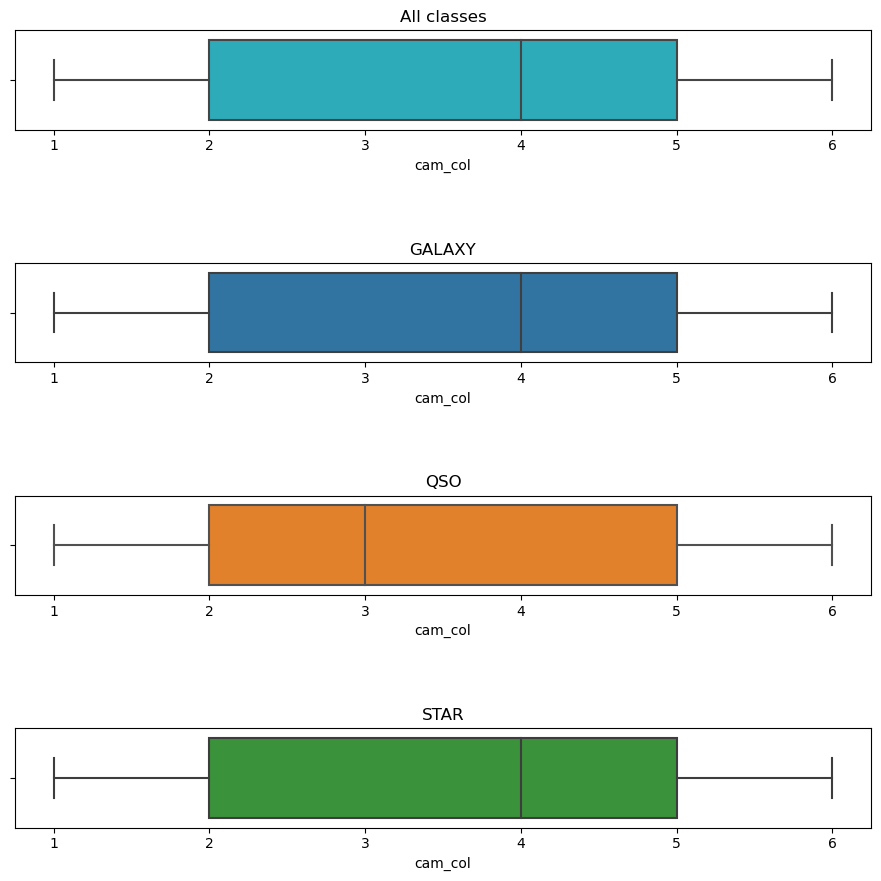

In [6]:
standard_boxplot_info('cam_col')

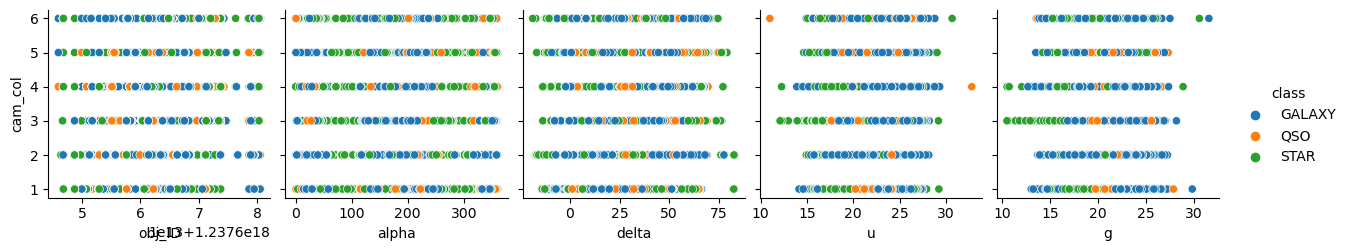

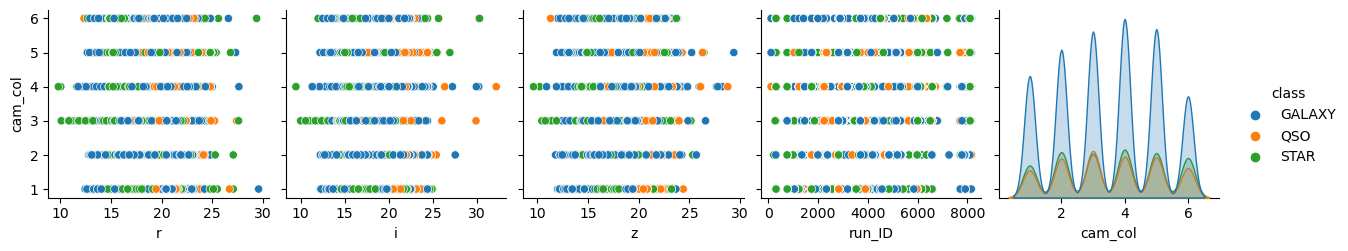

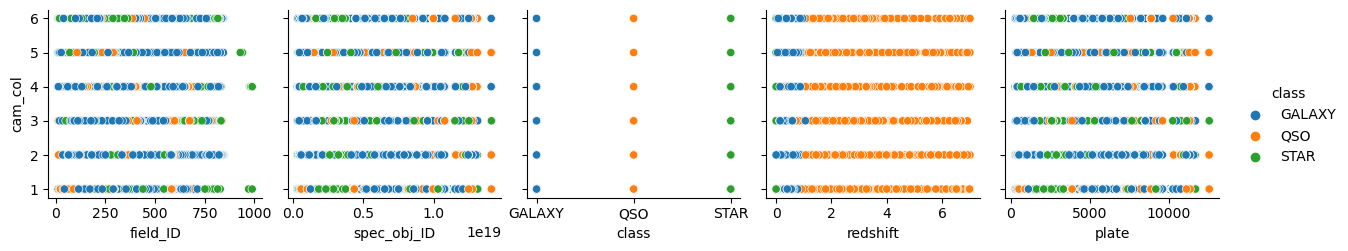

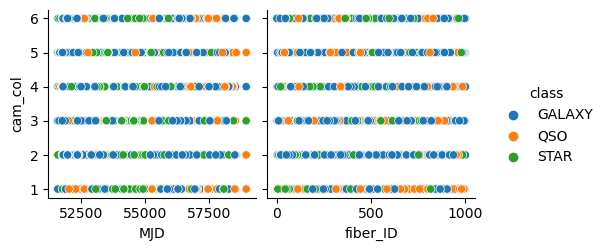

korelacja:
all_classes: 
cam_col        1.000000
fiber_ID       0.121588
delta          0.032553
alpha          0.019587
r              0.008472
g              0.007828
u              0.007673
i              0.007609
z              0.006416
redshift       0.000089
spec_obj_ID   -0.001952
plate         -0.001955
MJD           -0.006748
field_ID      -0.015662
obj_ID        -0.047016
run_ID        -0.047117
Name: cam_col, dtype: float64
GALAXY: 
cam_col        1.000000
fiber_ID       0.126233
alpha          0.062749
delta          0.044696
u              0.017858
g              0.017583
r              0.014963
redshift       0.014091
i              0.011566
z              0.010993
spec_obj_ID    0.006393
plate          0.006390
MJD            0.004658
field_ID      -0.029357
obj_ID        -0.052412
run_ID        -0.052512
Name: cam_col, dtype: float64
QSO: 
cam_col        1.000000
fiber_ID       0.048287
delta          0.017093
redshift      -0.000643
u             -0.003614
spec_obj_ID 

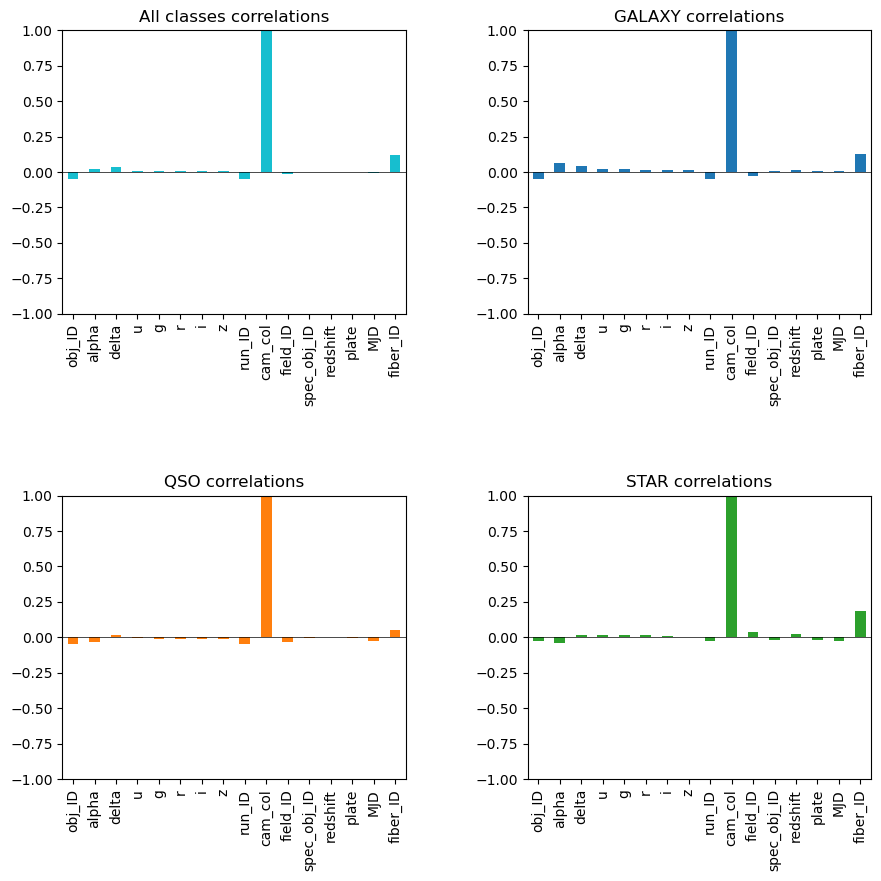

In [7]:
standard_correlation_visualisation('cam_col', point_limit)

# field_ID
Field number to identify each field

Zmienne najczęściej przyjmują wartości w okolicach 100, a od 200 wraz ze wzrostem wartości maleje szansa na jej osiągnięcie.
To powoduje istnienie dużej liczby, bo około 5%, wartości odstających. Ta tendencja utrzymuje się na przestrzeni wszystkich klas.
Ta kolumna jest skorelowana na poziomie około -0.16 z 'alpha' i 'delta'

field_ID
71     472
65     458
67     449
60     448
69     447
      ... 
748      1
977      1
979      1
974      1
934      1
Name: count, Length: 856, dtype: int64

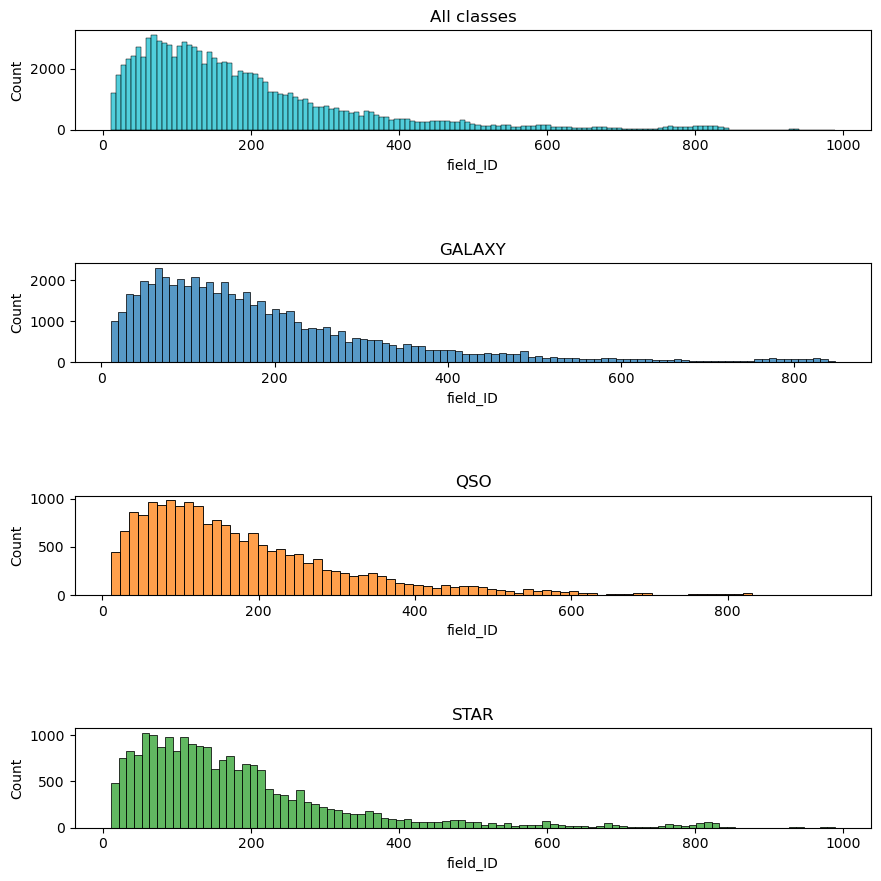

In [8]:
standard_distribution_info('field_ID')
df['field_ID'].value_counts()

All classes:
mediana = 146.0
średnia = 186.1270112701127
Q1 = 82.0 Q3 = 241.0
outlier_lower_bound = -156.5
outlier_upper_bound = 479.5
outlier_count = 5390
GALAXY:
mediana = 150.0
średnia = 191.0110522331567
Q1 = 83.0 Q3 = 248.0
outlier_lower_bound = -164.5
outlier_upper_bound = 495.5
outlier_count = 3111
QSO:
mediana = 143.0
średnia = 177.8869785348874
Q1 = 82.0 Q3 = 239.0
outlier_lower_bound = -153.5
outlier_upper_bound = 474.5
outlier_count = 789
STAR:
mediana = 141.0
średnia = 179.9170101421757
Q1 = 80.0 Q3 = 225.0
outlier_lower_bound = -137.5
outlier_upper_bound = 442.5
outlier_count = 1339


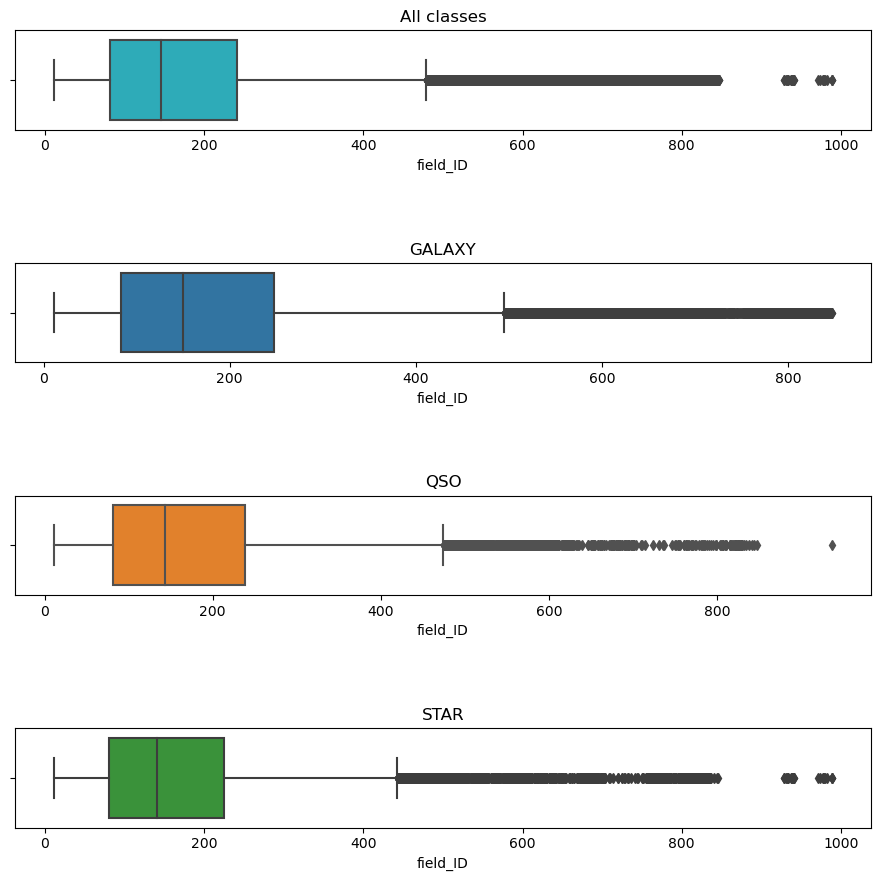

In [9]:
standard_boxplot_info('field_ID')

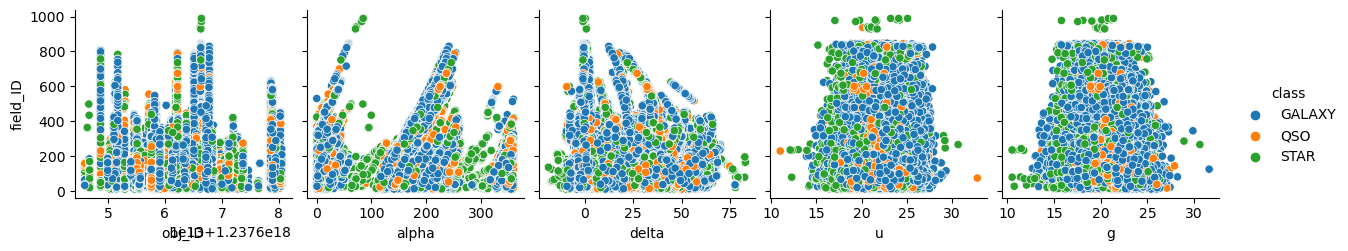

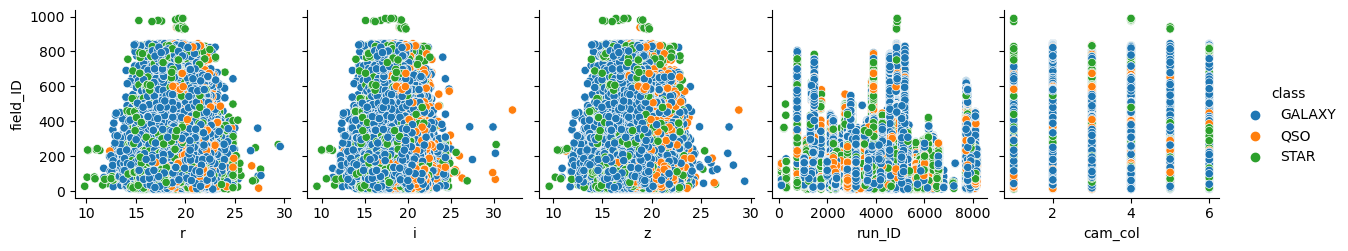

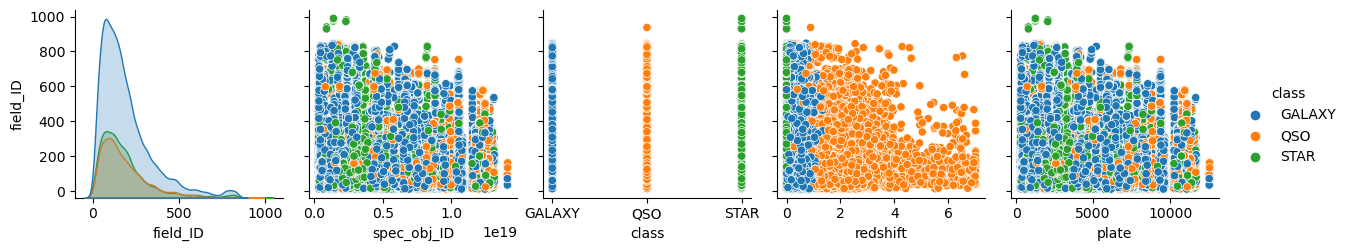

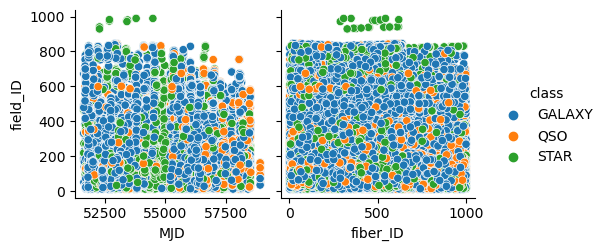

korelacja:
all_classes: 
field_ID       1.000000
run_ID         0.031544
obj_ID         0.031544
fiber_ID      -0.012312
u             -0.013365
cam_col       -0.015662
redshift      -0.021313
g             -0.022149
z             -0.026377
r             -0.026405
i             -0.026665
spec_obj_ID   -0.083459
plate         -0.083459
MJD           -0.095059
alpha         -0.165593
delta         -0.173393
Name: field_ID, dtype: float64
GALAXY: 
field_ID       1.000000
run_ID         0.026642
obj_ID         0.026640
z             -0.016326
i             -0.021327
fiber_ID      -0.024372
cam_col       -0.029357
r             -0.029865
u             -0.038777
g             -0.039762
redshift      -0.042920
plate         -0.091412
spec_obj_ID   -0.091412
MJD           -0.101323
alpha         -0.181600
delta         -0.185848
Name: field_ID, dtype: float64
QSO: 
field_ID       1.000000
run_ID         0.085666
obj_ID         0.085665
u              0.018647
redshift       0.007862
g         

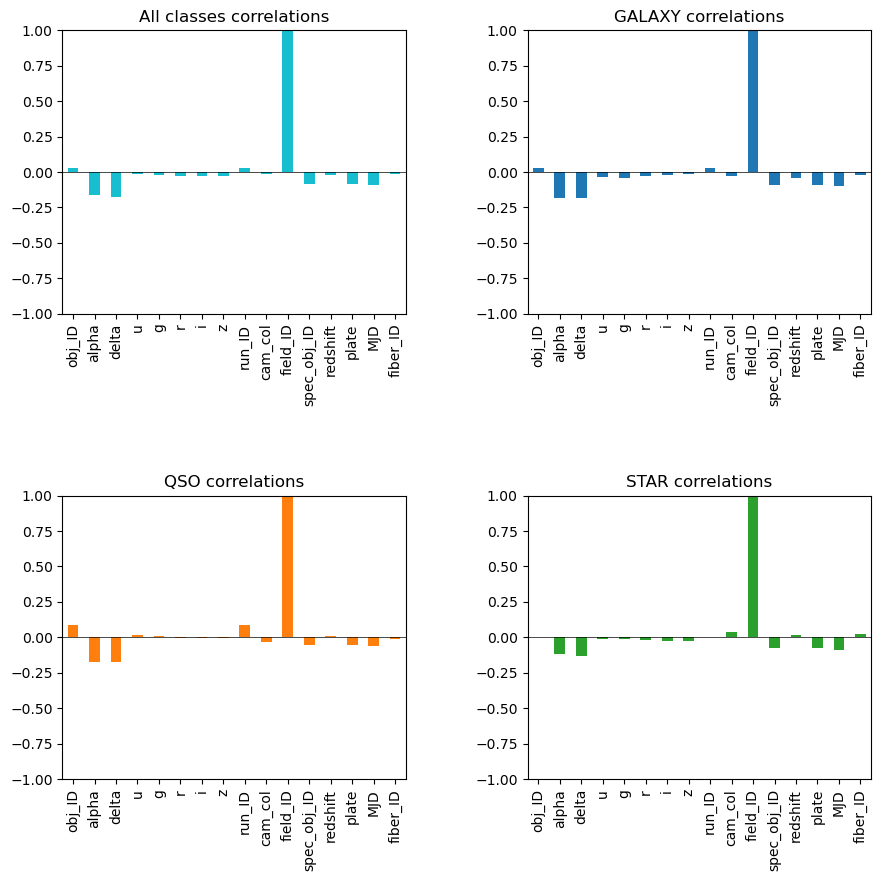

In [10]:
standard_correlation_visualisation('field_ID', point_limit)

# spec_obj_ID
Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)

Wartości są rozłożone na przedziale 0 - ~14e19, przy czym GALAXY ma bardziej wypośrodkowany rozkład, QSO jest prawoskośne, a STAR jest lewoskośne.  
Jedynie klasa STAR ma wartości odstające, ale jest ich tylko 18.  
'plate' i 'MJD' są skorelowane z tą zmienną blisko 1, a więc te kolumny nadają się do odrzucenia.  
'r', 'z', 'i' są też silnie skorelowane (0.4-0.6).  
'g', 'redshift', 'u' dodatkowo korelacje > 0.55 dla klasy GALAXY.

spec_obj_ID
6.543777e+18    1
5.644169e+18    1
9.834876e+18    1
3.301259e+18    1
4.864118e+18    1
               ..
7.642688e+18    1
5.787208e+17    1
5.205269e+18    1
4.486928e+18    1
8.343152e+18    1
Name: count, Length: 99999, dtype: int64

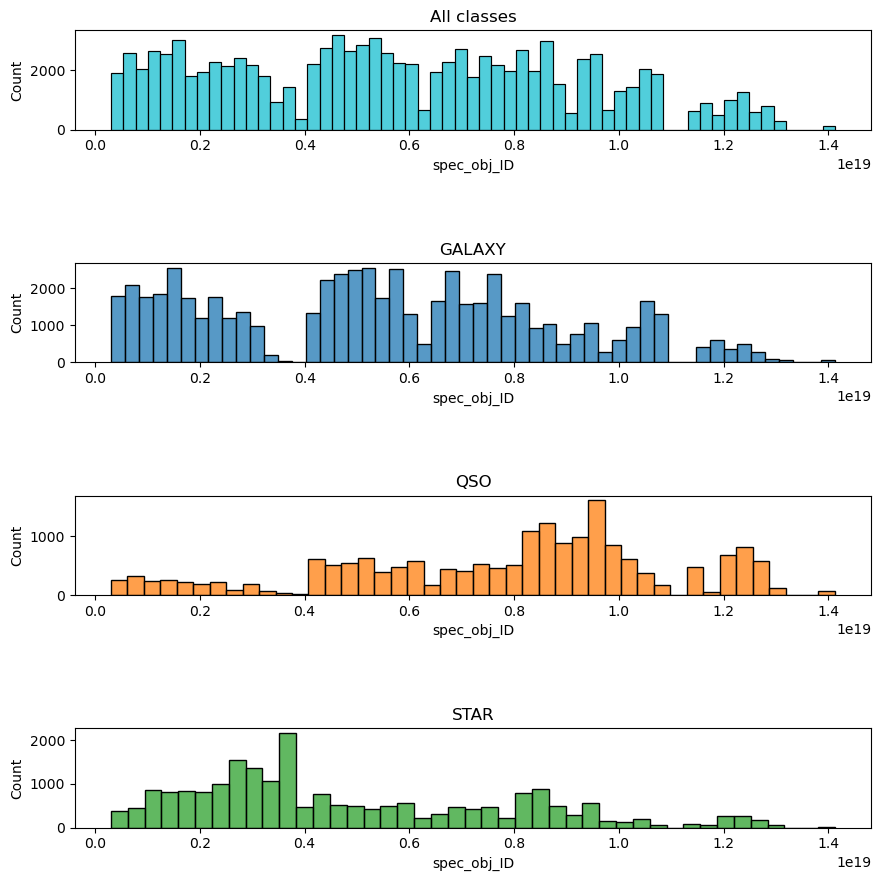

In [11]:
standard_distribution_info('spec_obj_ID')
df['spec_obj_ID'].value_counts()

All classes:
mediana = 5.614896192054121e+18
średnia = 5.783902823811245e+18
Q1 = 2.8441370410111734e+18 Q3 = 8.332364901738895e+18
outlier_lower_bound = -5.38820475008041e+18
outlier_upper_bound = 1.6564706692830478e+19
outlier_count = 0
GALAXY:
mediana = 5.370728747438987e+18
średnia = 5.48255350667799e+18
Q1 = 2.445527236397263e+18 Q3 = 7.647197487338641e+18
outlier_lower_bound = -5.356978140014805e+18
outlier_upper_bound = 1.544970286375071e+19
outlier_count = 0
QSO:
mediana = 8.527725165253253e+18
średnia = 7.817338428653282e+18
Q1 = 5.635234683350702e+18 Q3 = 9.847373338904908e+18
outlier_lower_bound = -6.829732999806065e+17
outlier_upper_bound = 1.6165581322236215e+19
outlier_count = 0
STAR:
mediana = 3.7110728279406423e+18
średnia = 4.827932724870689e+18
Q1 = 2.6098597012061814e+18 Q3 = 7.190136824068856e+18
outlier_lower_bound = -4.2605559830878305e+18
outlier_upper_bound = 1.4060552508362867e+19
outlier_count = 18


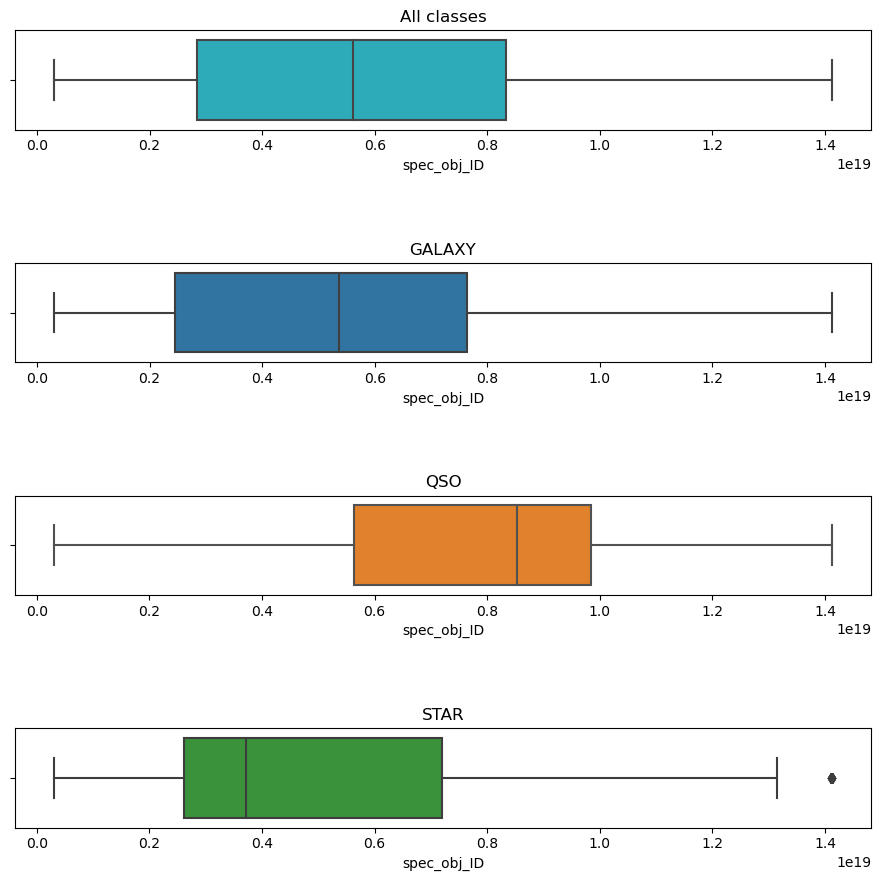

In [12]:
standard_boxplot_info('spec_obj_ID')

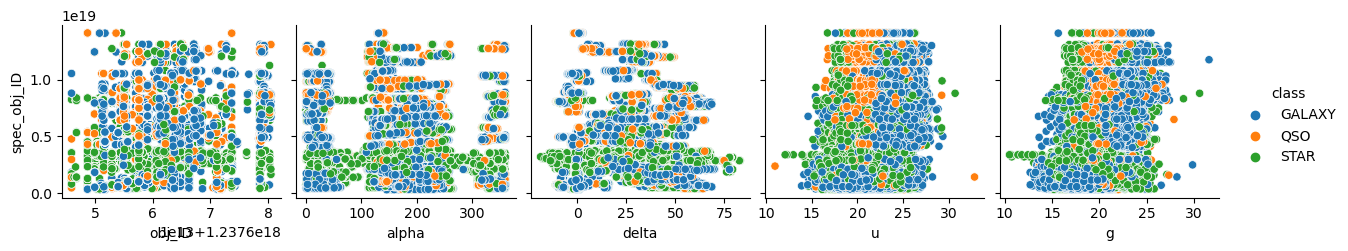

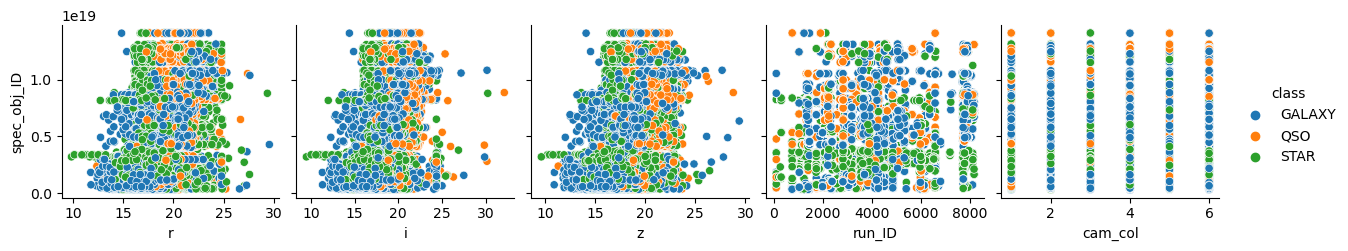

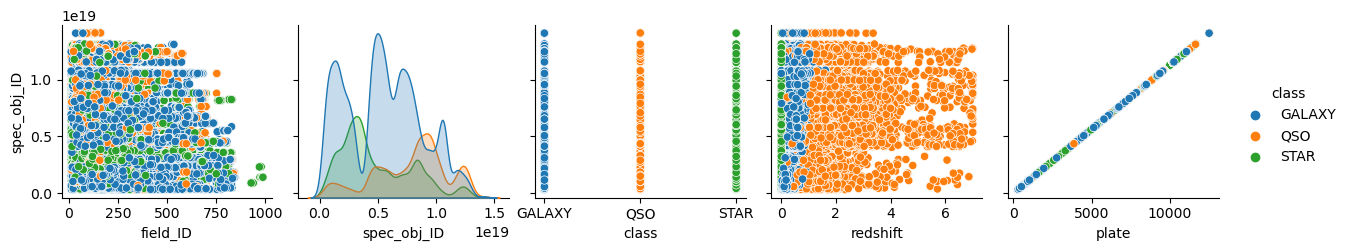

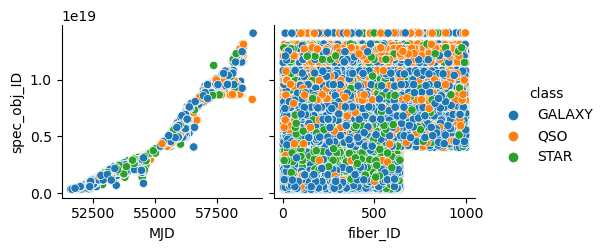

korelacja:
all_classes: 
spec_obj_ID    1.000000
plate          1.000000
MJD            0.970167
i              0.661640
r              0.655243
z              0.644332
g              0.584317
u              0.395856
redshift       0.388639
fiber_ID       0.241274
obj_ID         0.239454
run_ID         0.239453
delta          0.112322
cam_col       -0.001952
alpha         -0.002550
field_ID      -0.083459
Name: spec_obj_ID, dtype: float64
GALAXY: 
spec_obj_ID    1.000000
plate          1.000000
MJD            0.970438
r              0.759020
i              0.756511
z              0.732156
g              0.722176
redshift       0.709831
u              0.565161
obj_ID         0.280440
run_ID         0.280438
fiber_ID       0.239873
delta          0.067567
cam_col        0.006393
alpha         -0.055989
field_ID      -0.091412
Name: spec_obj_ID, dtype: float64
QSO: 
spec_obj_ID    1.000000
plate          1.000000
MJD            0.963767
r              0.400484
z              0.387421
i   

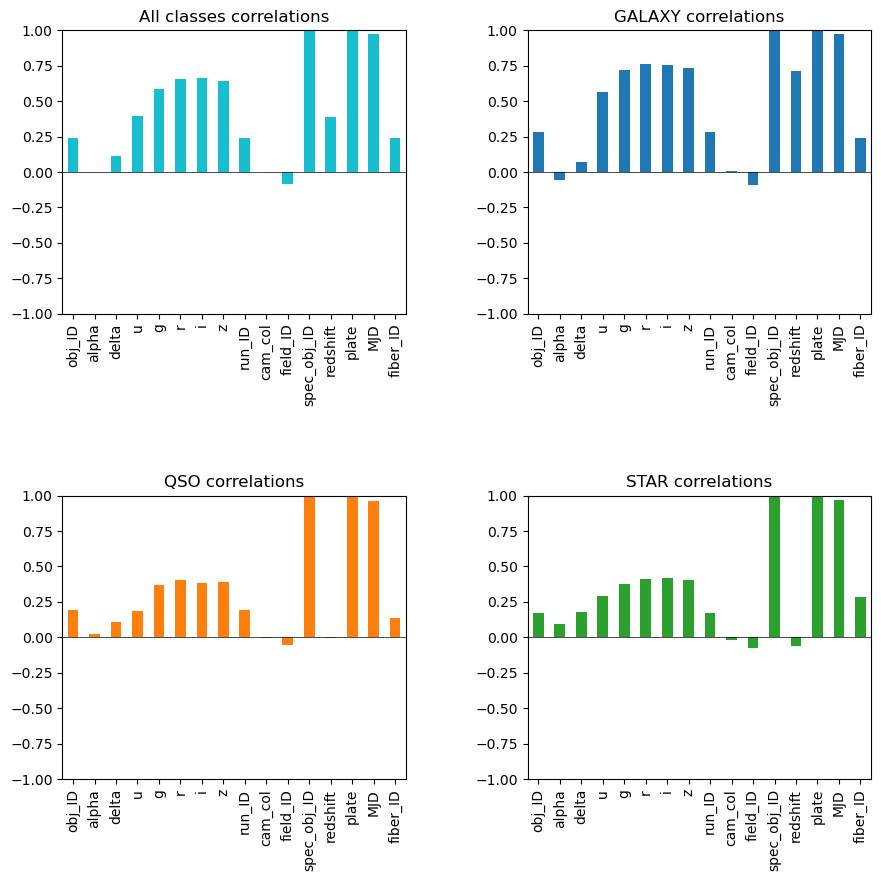

In [13]:
standard_correlation_visualisation('spec_obj_ID', point_limit)

# class
object class (galaxy, star or quasar object)

Najliczniejsza jest klasa GALAXY, bo jej licznośc jest około trzykrotnie większa od pozostałych klas.  
Ze względu na niewielki startowy rozmiar ramki danych (tylko 18 kolumn) dodanie kilku nowych kolumn i zwiększenie wymiarowości nie powinno znacząco pogorszyć modelu, a zatem zamiana tej zmiennej kategorycznej na numeryczną metodą one-hot wydaje się trafnym pomysłem.

class
GALAXY    59445
STAR      21593
QSO       18961
Name: count, dtype: int64

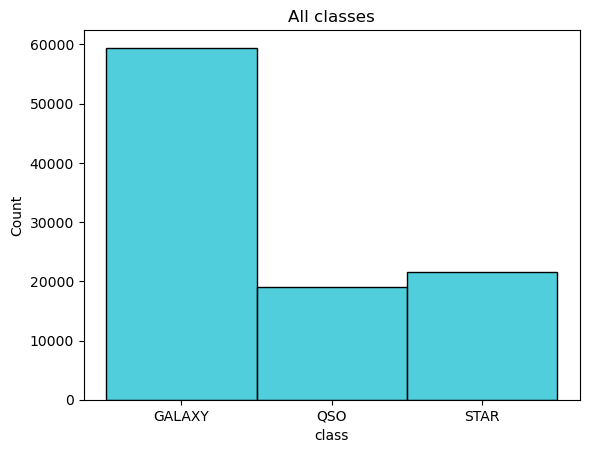

In [14]:
sns.histplot(data=df, x='class', color='#17becf').set(title='All classes')
df['class'].value_counts()

# redshift
redshift value based on the increase in wavelength

QSO jako rodzaj galaktyki ma podobny rozkład co GALAXY, tzn. poczerwienienie jest dodatnie. Warto zauważyć, że GALAXY przyjmuje wartości w większości w przedziale 0-1, a QSO 0-3. STAR natomiast ma odmienny rozkład; Gaussa blisko skupiony wokół zera. To powoduje, że łączny rozkład zmiennej 'redshift' najczęściej (i to znacząco) przyjmuje wartości bliskie zeru.   
Ilość wartości odstających jest duża, z czego ze względu na różny zakres zmiennej w podziale na klasy wartości odstające dla poszczególnych klas różnią się od wartości odstających dla rozkładu łącznego (głównie przez wpływ rozkładu QSO).  
'u', 'g', 'r', 'i', 'z' są skorelowane w klasach GALAXY i QSO (w GALAXY znacząco, bo >0.6, w QSO znacznie mniej, bo ~0.17-~0.32), a GALAXY jest dodatkowo silnie skorelowane z 'MJD', 'spec_obj_ID', 'plate' (>0.6).  
Ze względu na bardzo charakterystyczne rozkłady zmiennej w podziale na klasy można wysnuć hipotezę o niebagatelnym znaczeniu cechy 'redshift' w zadaniu klasyfikacji obiektu w oparciu o analizę przyjmowanych wartości przez tę zmienną.

redshift
 0.000000    412
 7.011245      6
 0.004153      4
-0.004136      3
 0.004153      3
            ... 
 0.564236      1
-0.000039      1
 0.435111      1
 0.440730      1
 0.542944      1
Name: count, Length: 99294, dtype: int64

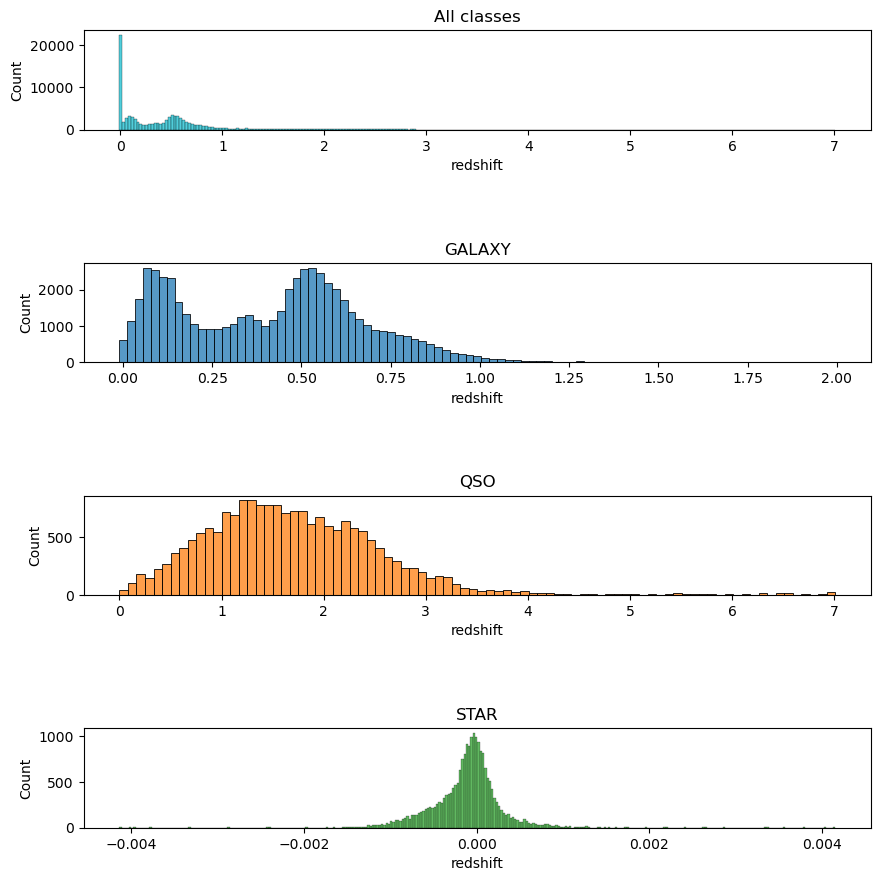

In [15]:
standard_distribution_info('redshift')
df['redshift'].value_counts()

All classes:
mediana = 0.4241756
średnia = 0.5766665697925817
Q1 = 0.054521694999999995 Q3 = 0.7041720499999999
outlier_lower_bound = -0.9199538374999998
outlier_upper_bound = 1.6786475824999998
outlier_count = 8989
GALAXY:
mediana = 0.4562742
średnia = 0.4215961504447531
Q1 = 0.1645267 Q3 = 0.5946987
outlier_lower_bound = -0.4807313
outlier_upper_bound = 1.2399567
outlier_count = 254
QSO:
mediana = 1.617232
średnia = 1.7196760892911345
Q1 = 1.106605 Q3 = 2.220279
outlier_lower_bound = -0.563906
outlier_upper_bound = 3.89079
outlier_count = 362
STAR:
mediana = -7.61614e-05
średnia = -0.00011490666184239198
Q1 = -0.0002953639 Q3 = 7.541069e-05
outlier_lower_bound = -0.000851525785
outlier_upper_bound = 0.000631572575
outlier_count = 1599


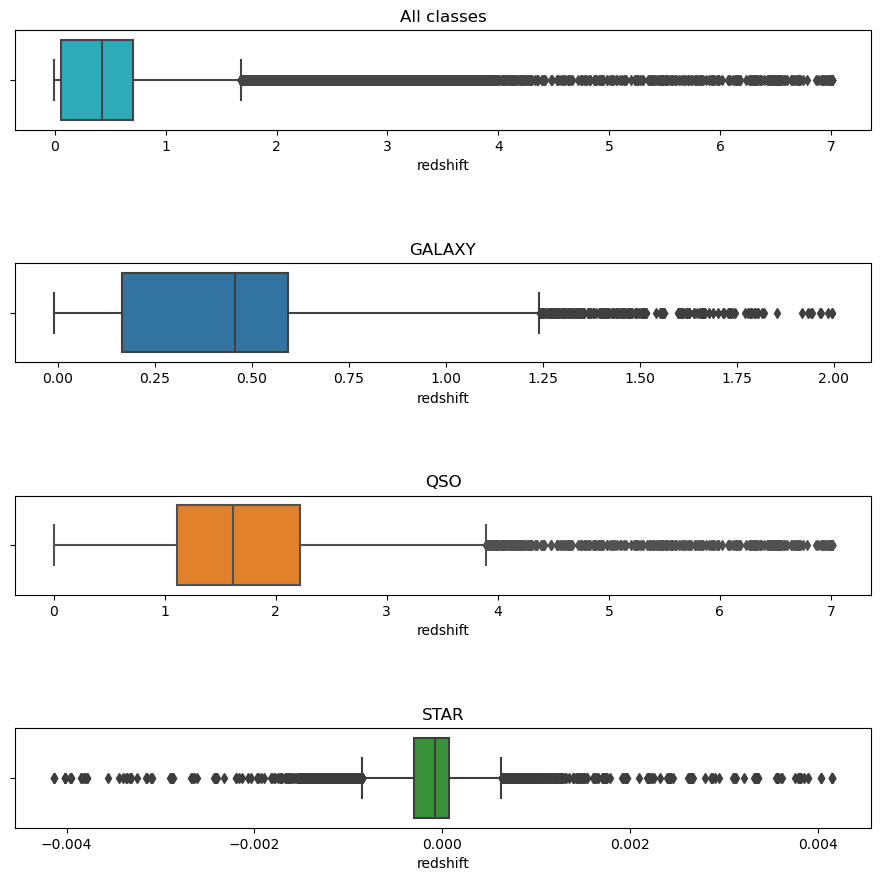

In [16]:
standard_boxplot_info('redshift')

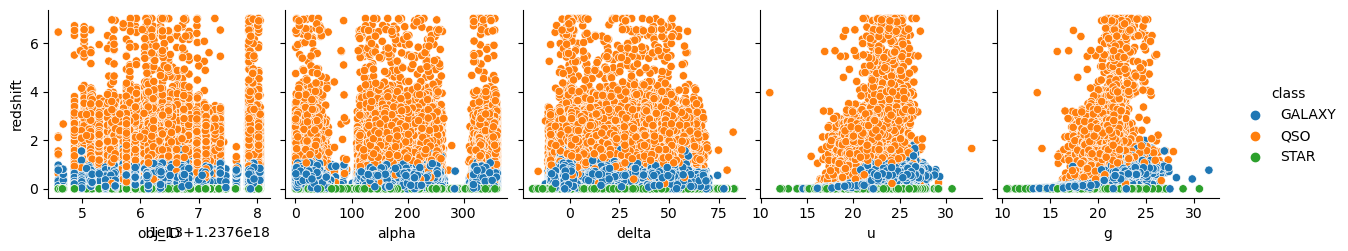

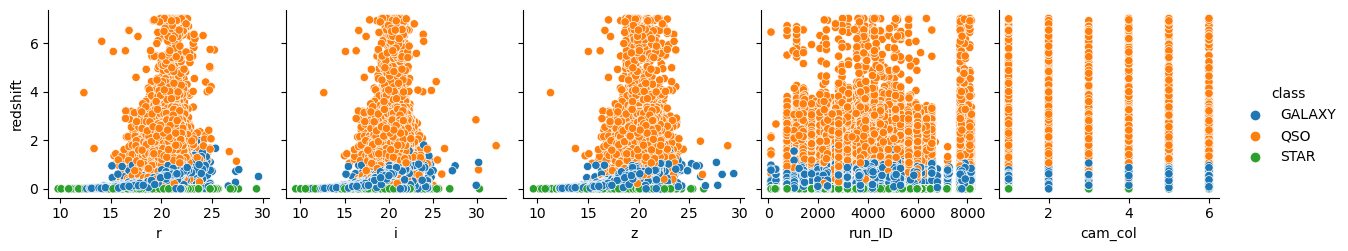

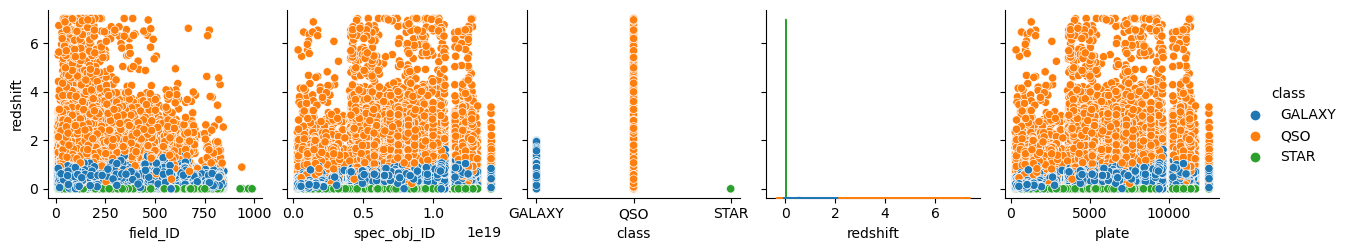

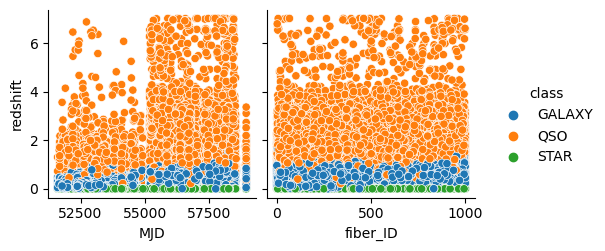

korelacja:
all_classes: 
redshift       1.000000
z              0.501060
i              0.492381
r              0.433237
spec_obj_ID    0.388639
plate          0.388638
MJD            0.387107
g              0.318910
u              0.166816
fiber_ID       0.127036
obj_ID         0.065387
run_ID         0.065386
delta          0.031629
alpha          0.001671
cam_col        0.000089
field_ID      -0.021313
Name: redshift, dtype: float64
GALAXY: 
redshift       1.000000
r              0.844537
g              0.829745
i              0.811339
z              0.773789
MJD            0.719228
spec_obj_ID    0.709831
plate          0.709830
u              0.665306
fiber_ID       0.208381
obj_ID         0.168583
run_ID         0.168581
cam_col        0.014091
delta         -0.032921
field_ID      -0.042920
alpha         -0.067875
Name: redshift, dtype: float64
QSO: 
redshift       1.000000
u              0.324042
z              0.192720
i              0.192187
r              0.178497
g         

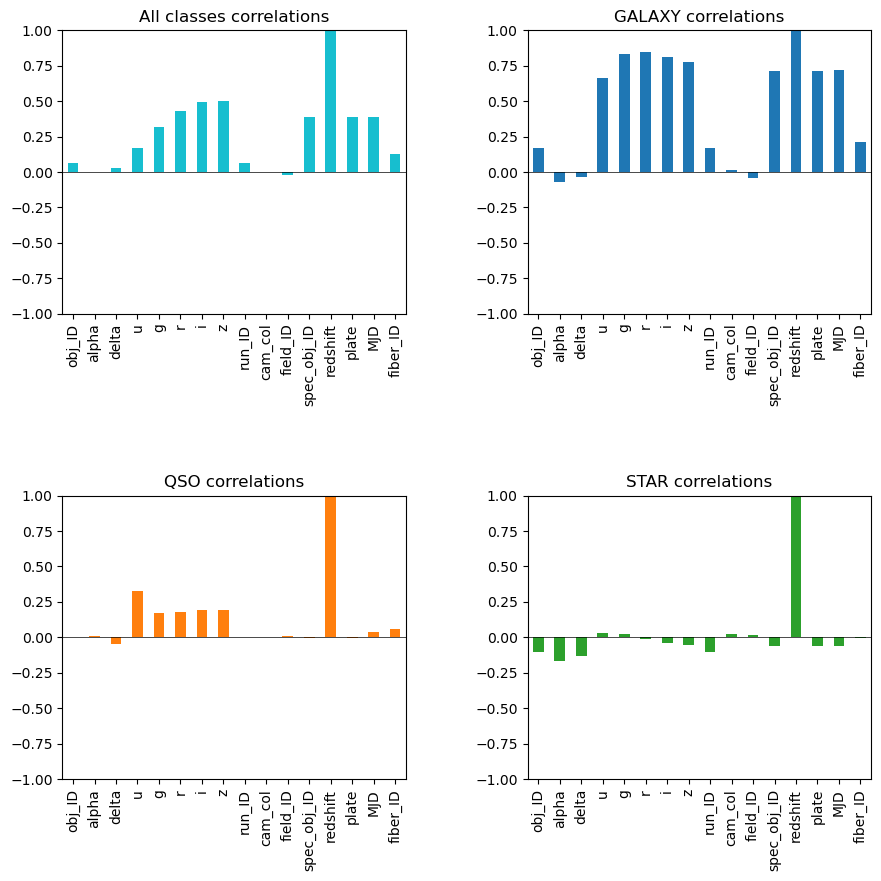

In [17]:
standard_correlation_visualisation('redshift', point_limit)

# plate 
plate ID, identifies each plate in SDSS

Ta zmienna ma podobny rozkład co 'space_obj_ID'. Co więcej, pozostałe parametry są również podobne do wspomnianej zmiennej. Powodem takiego zjawiska jest zaobserwowany wcześniej fakt, mianowicie; 'space_obj_ID' jak i 'plate' są skorelowane ze sobą ze współczynnikiem korelacji równym 1. Zdublowanie informacji poprzez podanie identycznych cech do modelu może skutkować brakiem równowagi w porónaniu do pozostałych cech w zadaniu klasyfikacji, a zatem jedna z tych kolumn powinna zostać usunięta z ramki danych.

plate
6301    98
7699    97
7407    96
7147    95
6516    94
        ..
2512     1
5745     1
2818     1
1709     1
2661     1
Name: count, Length: 6284, dtype: int64

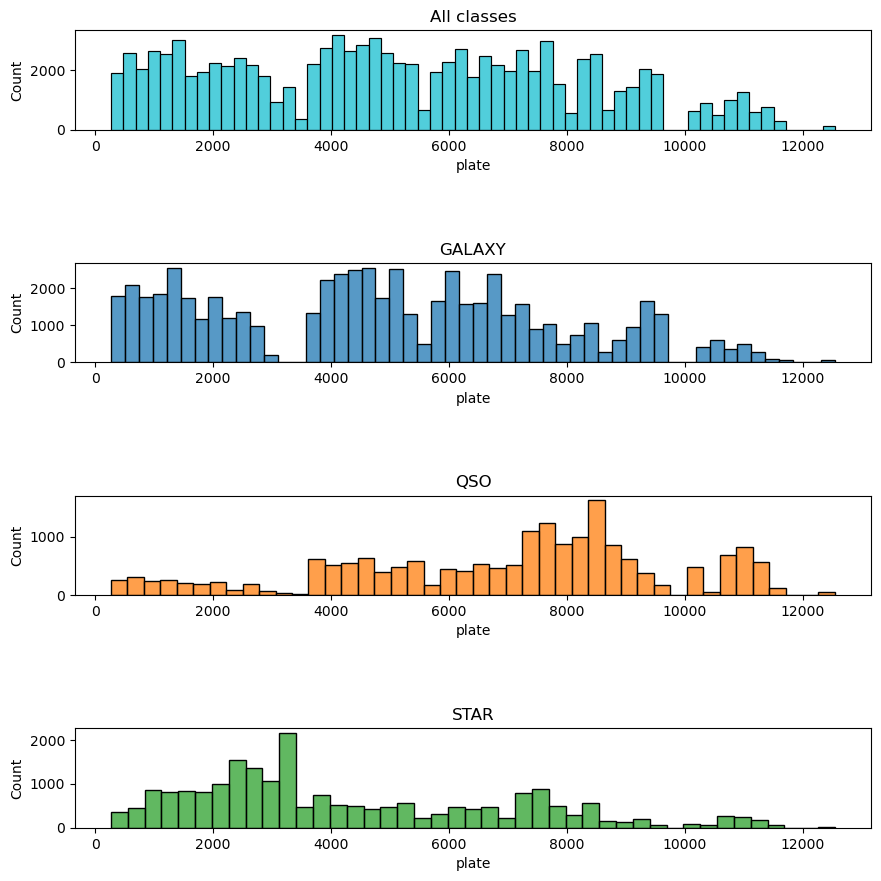

In [18]:
standard_distribution_info('plate')
df['plate'].value_counts()

All classes:
mediana = 4987.0
średnia = 5137.027890278903
Q1 = 2526.0 Q3 = 7400.5
outlier_lower_bound = -4785.75
outlier_upper_bound = 14712.25
outlier_count = 0
GALAXY:
mediana = 4770.0
średnia = 4869.375607704601
Q1 = 2172.0 Q3 = 6792.0
outlier_lower_bound = -4758.0
outlier_upper_bound = 13722.0
outlier_count = 0
QSO:
mediana = 7574.0
średnia = 6943.071620695111
Q1 = 5005.0 Q3 = 8746.0
outlier_lower_bound = -606.5
outlier_upper_bound = 14357.5
outlier_count = 0
STAR:
mediana = 3296.0
średnia = 4287.965451766776
Q1 = 2318.0 Q3 = 6386.0
outlier_lower_bound = -3784.0
outlier_upper_bound = 12488.0
outlier_count = 18


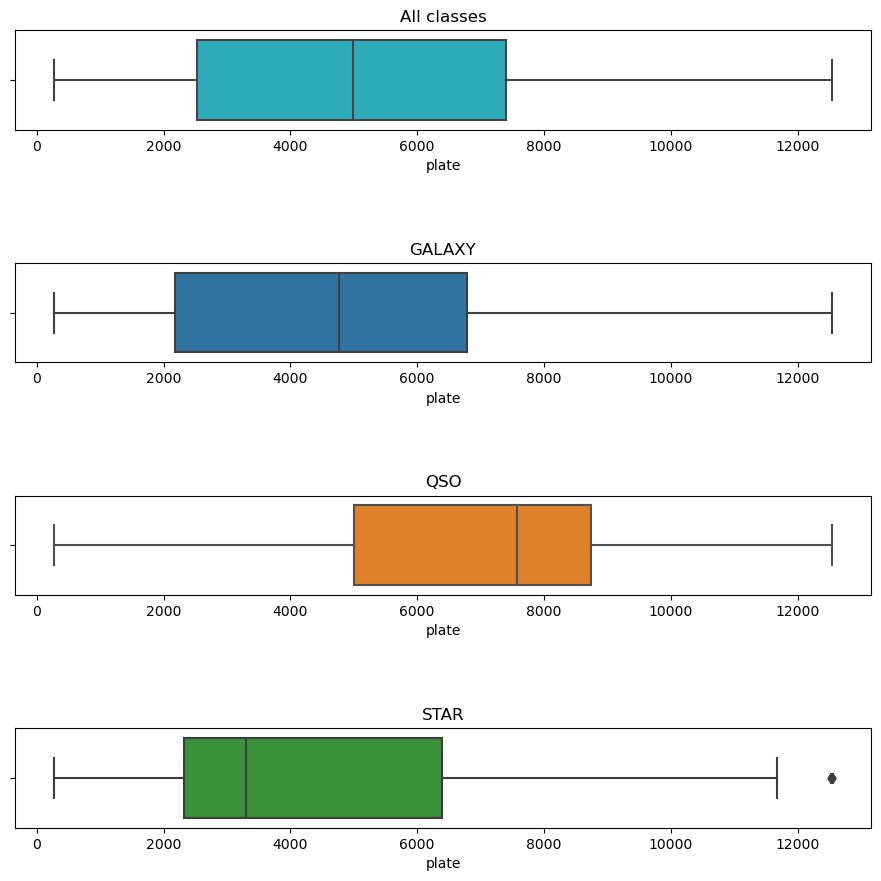

In [19]:
standard_boxplot_info('plate')

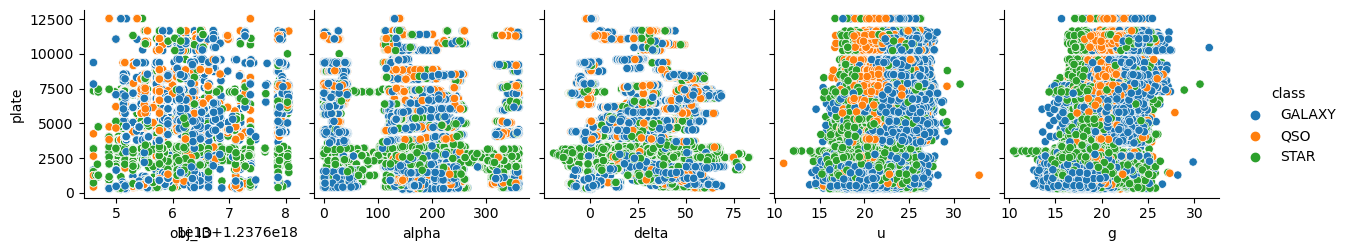

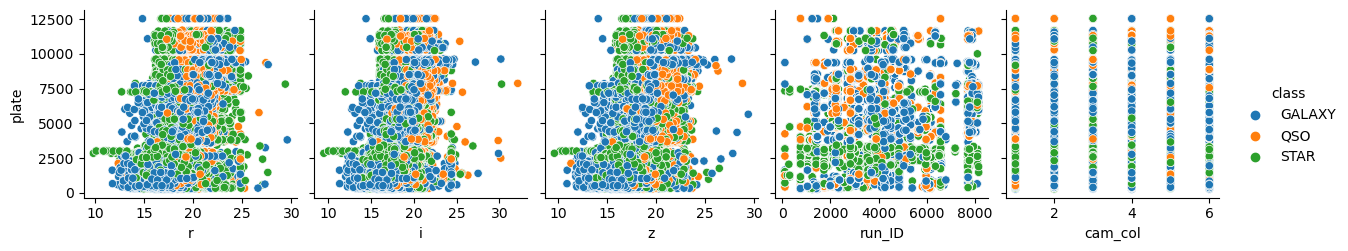

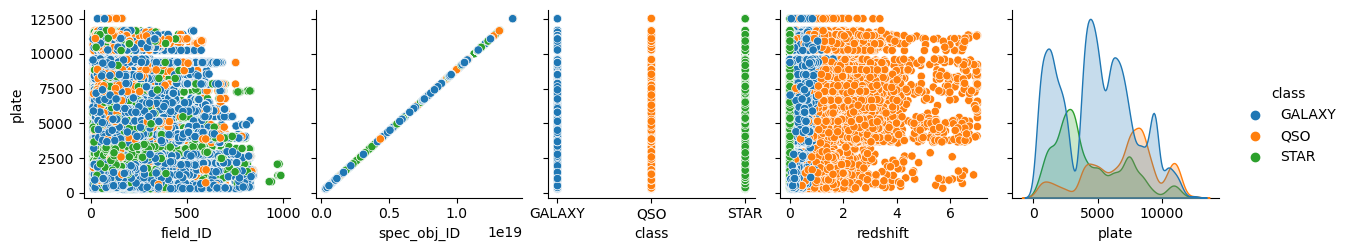

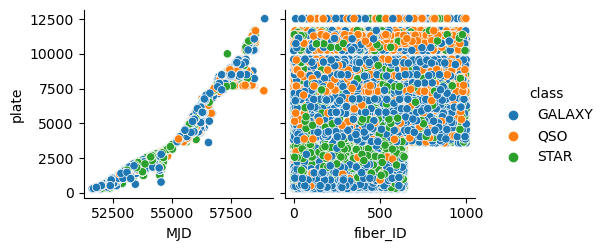

korelacja:
all_classes: 
plate          1.000000
spec_obj_ID    1.000000
MJD            0.970167
i              0.661639
r              0.655242
z              0.644331
g              0.584315
u              0.395854
redshift       0.388638
fiber_ID       0.241253
obj_ID         0.239453
run_ID         0.239453
delta          0.112322
cam_col       -0.001955
alpha         -0.002551
field_ID      -0.083459
Name: plate, dtype: float64
GALAXY: 
plate          1.000000
spec_obj_ID    1.000000
MJD            0.970437
r              0.759019
i              0.756510
z              0.732155
g              0.722174
redshift       0.709830
u              0.565159
obj_ID         0.280440
run_ID         0.280438
fiber_ID       0.239851
delta          0.067566
cam_col        0.006390
alpha         -0.055990
field_ID      -0.091412
Name: plate, dtype: float64
QSO: 
plate          1.000000
spec_obj_ID    1.000000
MJD            0.963766
r              0.400482
z              0.387420
i              0

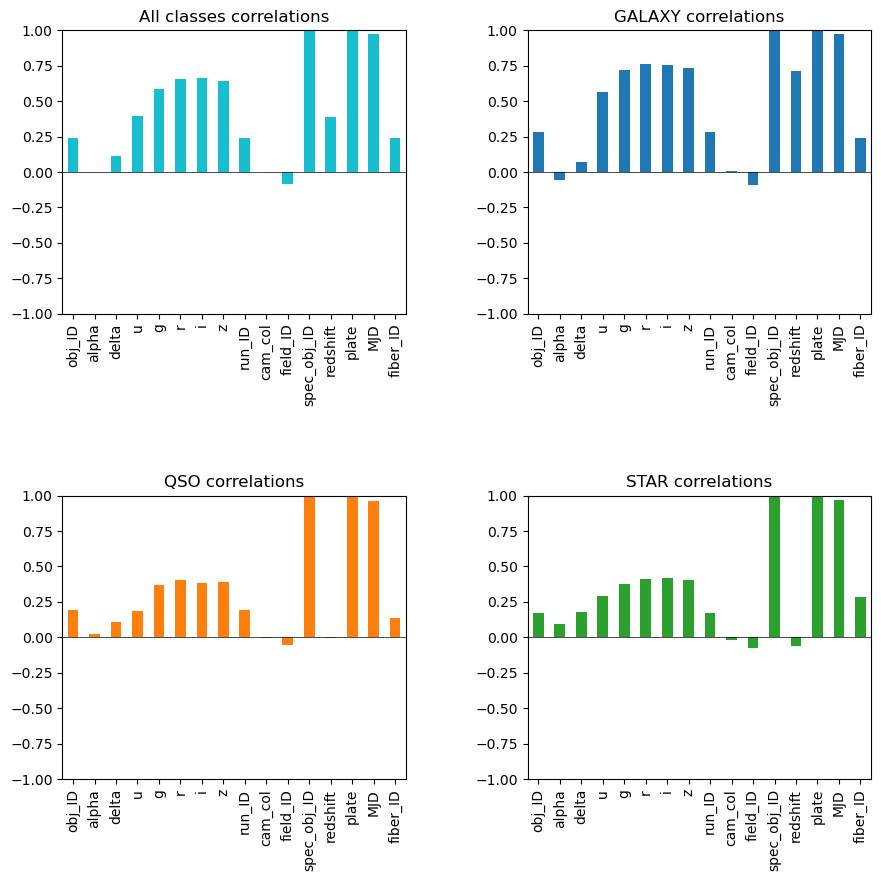

In [20]:
standard_correlation_visualisation('plate', point_limit)

# MJD
Modified Julian Date, used to indicate when a given piece of SDSS data was taken

Podobnie jak we wcześniej opisanej kolumnie (patrz: 'plate') skorelowanie ze zmienną 'space_obj_ID' i 'plate' jest bardzo wysokie (>0.96). Wynika z tego, że pozostałe parametry tej zmiennej są prawie identyczne (co można sprawdzić w sposób empiryczny). Wniosek z tego jest następujący: 2 z 3 silnie skorelowanych kolumn ('space_obj_ID', 'plate', 'MJD') na pewno powinny zostać usunięte z ramki danych, bo ich obecność nie niesie ze sobą istnienia nowych informacji.

MJD
56625    249
58162    228
56658    217
56390    216
56385    201
        ... 
55517      1
54894      1
53075      1
53906      1
52054      1
Name: count, Length: 2180, dtype: int64

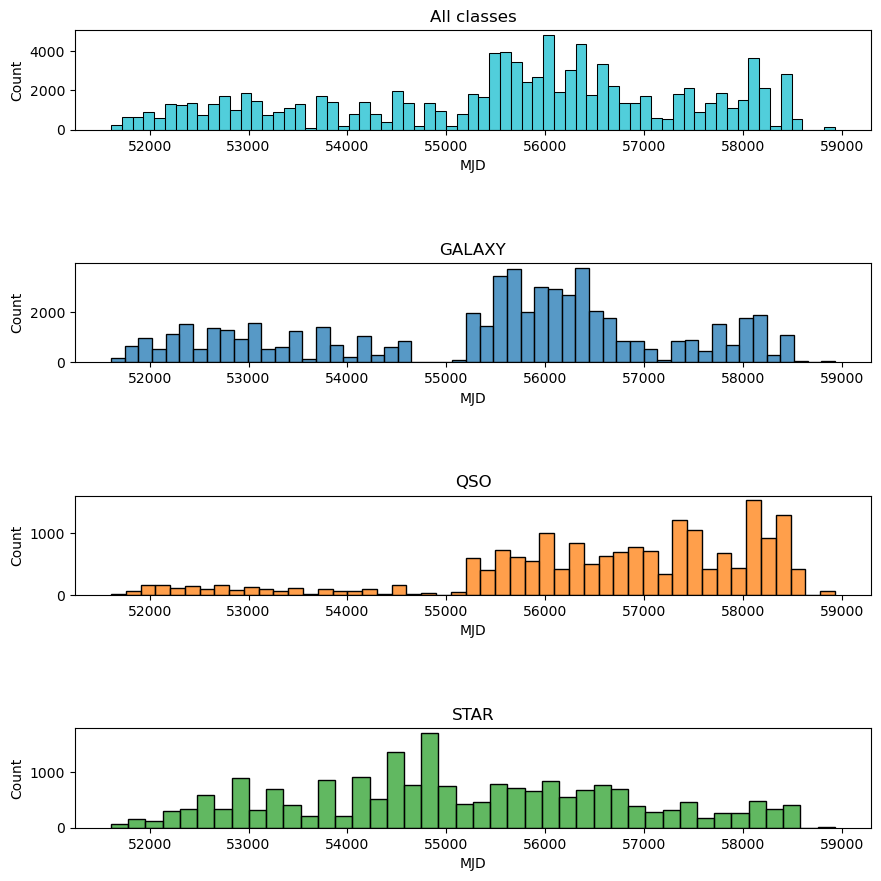

In [21]:
standard_distribution_info('MJD')
df['MJD'].value_counts()

All classes:
mediana = 55869.0
średnia = 55588.65368653687
Q1 = 54234.0 Q3 = 56777.0
outlier_lower_bound = 50419.5
outlier_upper_bound = 60591.5
outlier_count = 0
GALAXY:
mediana = 55830.0
średnia = 55423.463605013036
Q1 = 53845.0 Q3 = 56543.0
outlier_lower_bound = 49798.0
outlier_upper_bound = 60590.0
outlier_count = 0
QSO:
mediana = 56955.0
średnia = 56627.54717578187
Q1 = 55868.0 Q3 = 57870.0
outlier_lower_bound = 52865.0
outlier_upper_bound = 60873.0
outlier_count = 975
STAR:
mediana = 54924.0
średnia = 55131.156578520815
Q1 = 53905.0 Q3 = 56365.0
outlier_lower_bound = 50215.0
outlier_upper_bound = 60055.0
outlier_count = 0


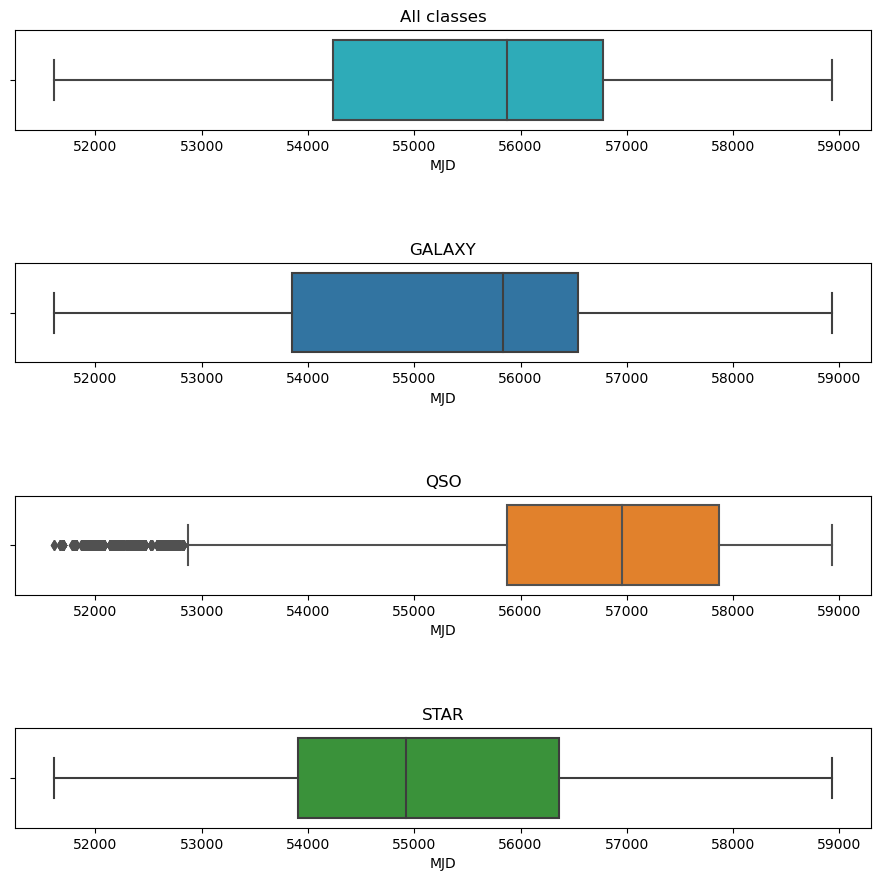

In [22]:
standard_boxplot_info('MJD')

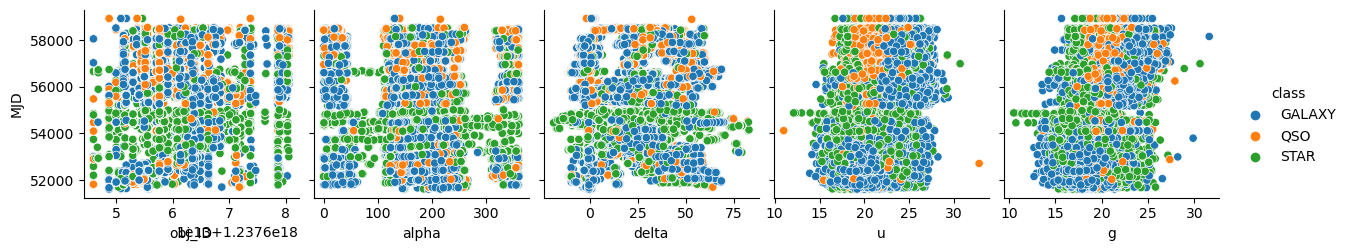

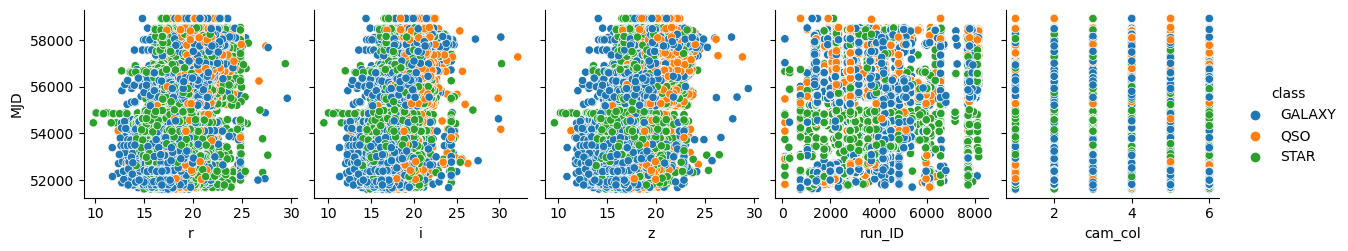

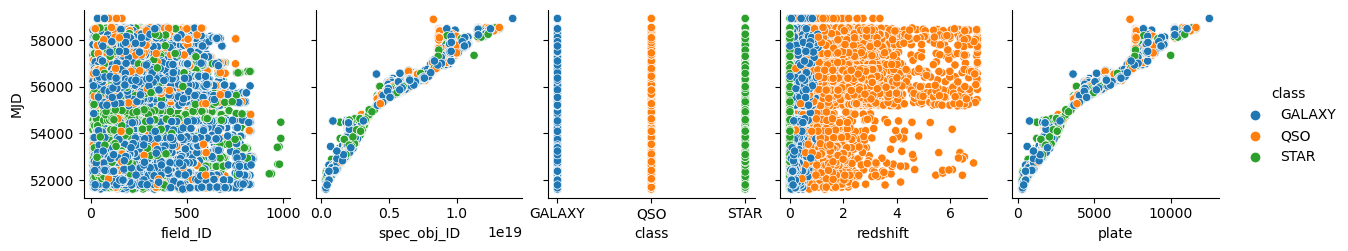

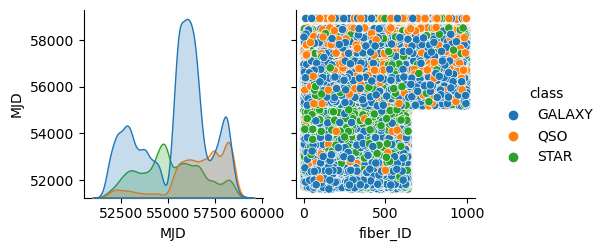

korelacja:
all_classes: 
MJD            1.000000
spec_obj_ID    0.970167
plate          0.970167
i              0.672522
r              0.671180
z              0.653784
g              0.610809
u              0.436346
redshift       0.387107
obj_ID         0.262686
run_ID         0.262685
fiber_ID       0.256968
delta          0.107330
alpha          0.019945
cam_col       -0.006748
field_ID      -0.095059
Name: MJD, dtype: float64
GALAXY: 
MJD            1.000000
spec_obj_ID    0.970438
plate          0.970437
r              0.774133
i              0.762025
g              0.755211
z              0.735576
redshift       0.719228
u              0.616537
obj_ID         0.306981
run_ID         0.306979
fiber_ID       0.260715
delta          0.051061
cam_col        0.004658
alpha         -0.031361
field_ID      -0.101323
Name: MJD, dtype: float64
QSO: 
MJD            1.000000
spec_obj_ID    0.963767
plate          0.963766
r              0.440888
z              0.423921
i              0.422

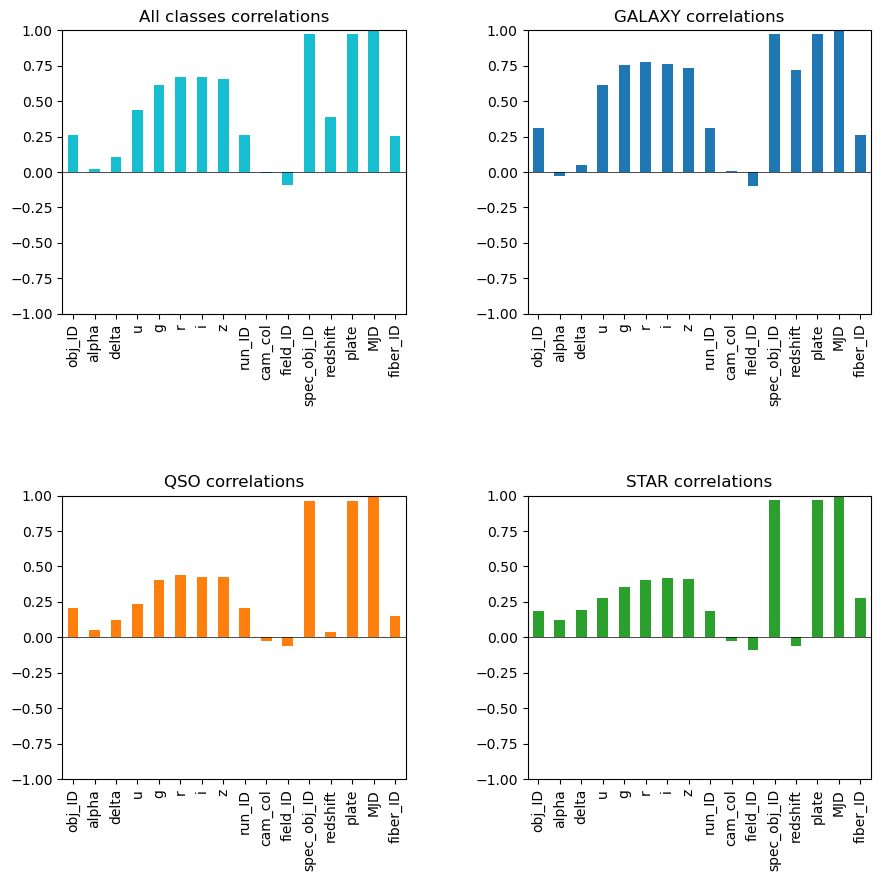

In [23]:
standard_correlation_visualisation('MJD', point_limit)

# fiber_ID
fiber ID that identifies the fiber that pointed the light at the focal plane in each observati

Rozkład zmiennej 'fiber_ID' jest podobny do jednostajnego z tym wyjątkiem, że dla klasy GALAXY i STAR rozkład wartości większych niż 600 jest dalej jednostajny, jednak ilość ich wystąpień jest mniejsza.  
W ramce danych nie ma obecnych wartości odstających jeśli chodzi o tę zmienną.  
Wartości 'fiber_ID' są w przybliżeniu <600 dla 'MJD' <5500, 'plate' <4000 i 'space_obj_ID' <0,5. Tę samą zależność można zaobserwować w zmiennych 'alpha' dla wartości 100+-10 i 275+-10 oraz 'delta' <-5 i >75 (będących głównie obserwacjami klasy STAR). Ta zależność przenosi się też poniekąd na pozostałe odpowiednio silnie skorelowane zmienne.  
Niewielka korelacja może być zauważona dla 'u', 'g', 'r', 'i', 'z', 'space_obj_ID', 'plate', 'MJD', 'redshift' dla klasy GALAXY (0.2-0.26) i 'space_obj_ID', 'plate', 'MJD' dla klasy STAR (0.28).

fiber_ID
637    159
105    158
597    158
611    154
321    154
      ... 
746     50
744     49
942     48
768     47
906     45
Name: count, Length: 1000, dtype: int64

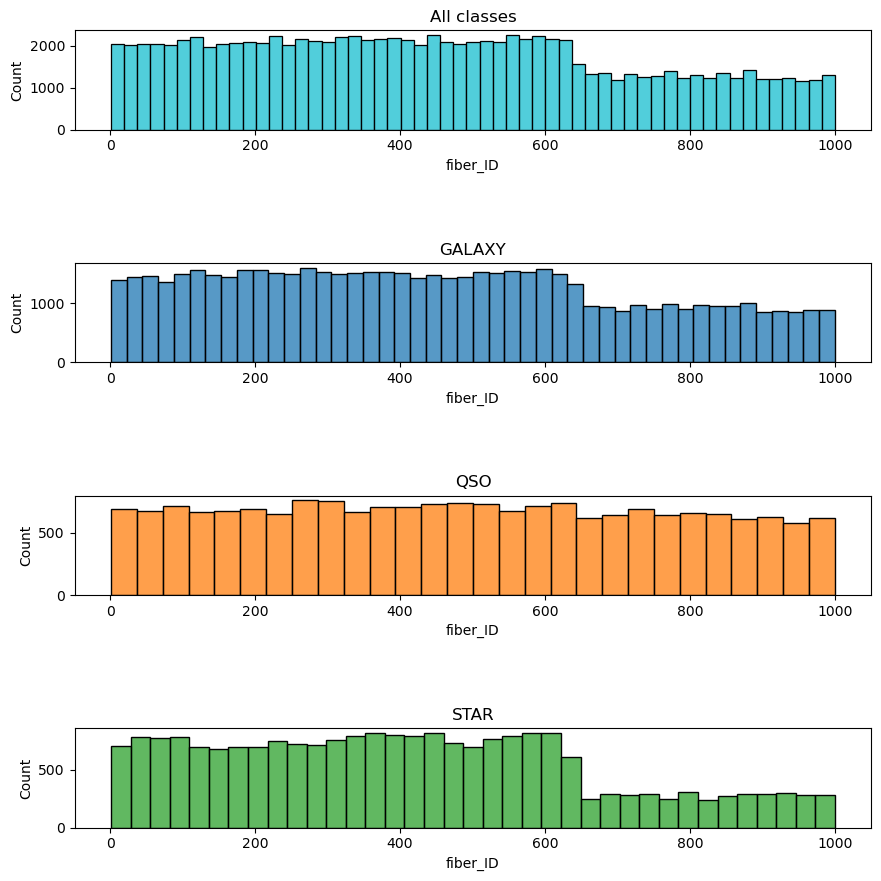

In [24]:
standard_distribution_info('fiber_ID')
df['fiber_ID'].value_counts()

All classes:
mediana = 433.0
średnia = 449.3156131561316
Q1 = 221.0 Q3 = 645.0
outlier_lower_bound = -415.0
outlier_upper_bound = 1281.0
outlier_count = 0
GALAXY:
mediana = 433.0
średnia = 450.6458575153503
Q1 = 221.0 Q3 = 649.0
outlier_lower_bound = -421.0
outlier_upper_bound = 1291.0
outlier_count = 0
QSO:
mediana = 486.0
średnia = 489.76841938716314
Q1 = 250.0 Q3 = 730.0
outlier_lower_bound = -470.0
outlier_upper_bound = 1450.0
outlier_count = 0
STAR:
mediana = 394.0
średnia = 410.13152410503403
Q1 = 201.0 Q3 = 582.0
outlier_lower_bound = -370.5
outlier_upper_bound = 1153.5
outlier_count = 0


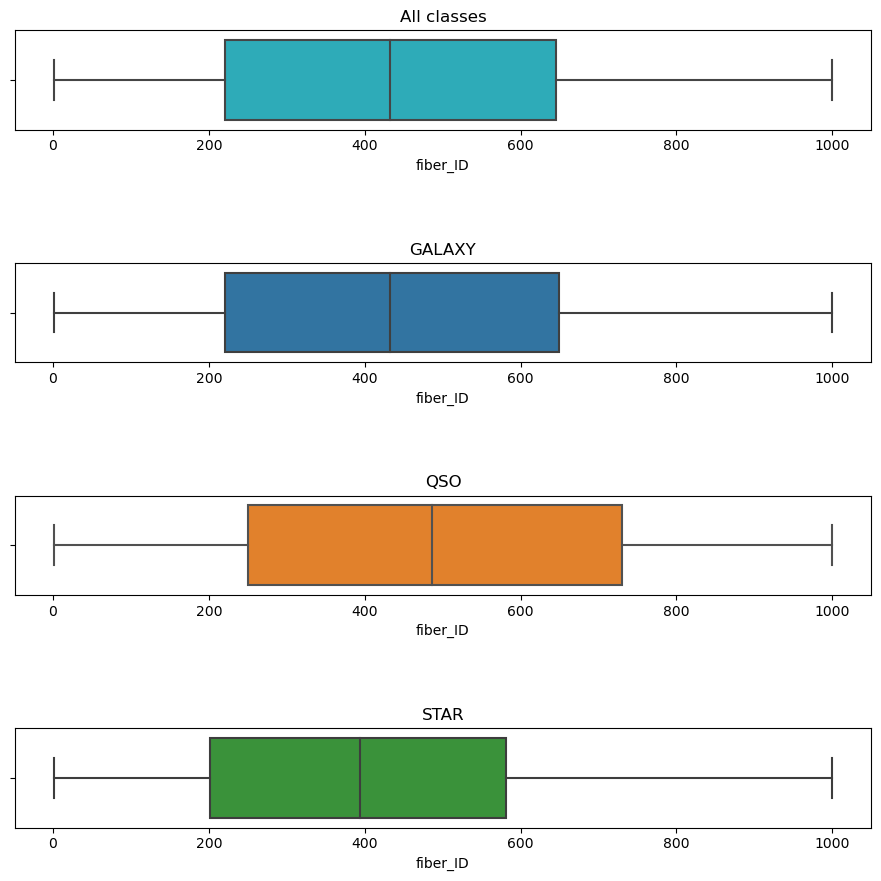

In [25]:
standard_boxplot_info('fiber_ID')

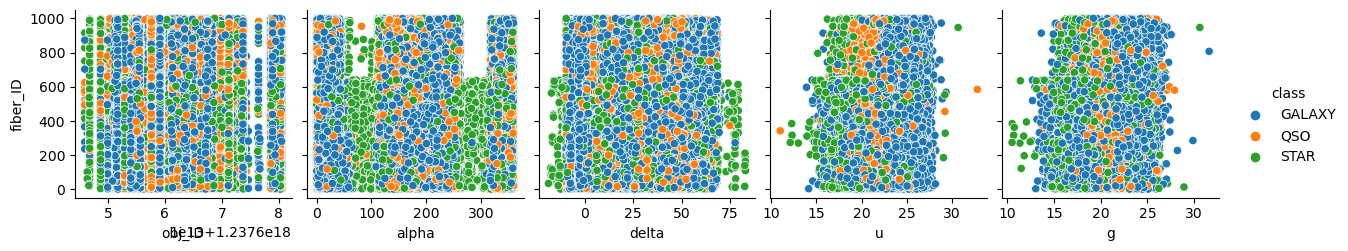

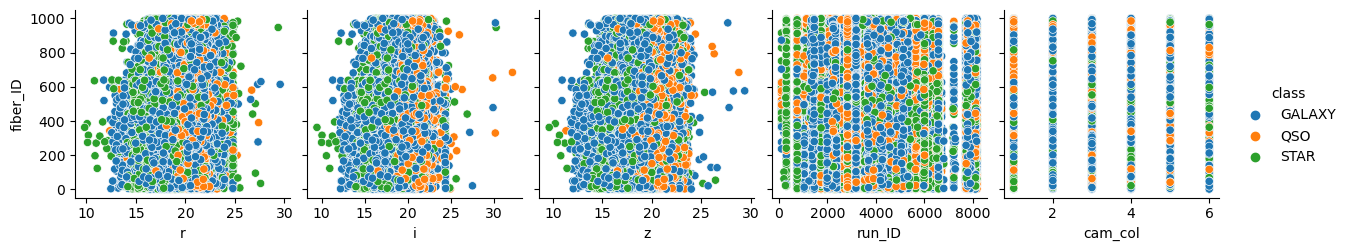

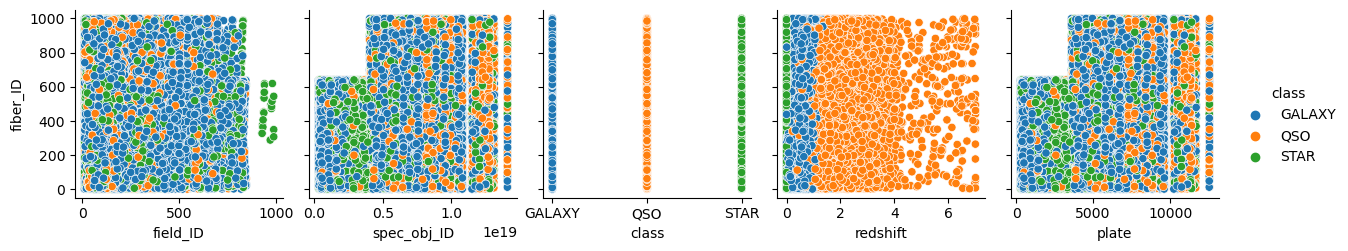

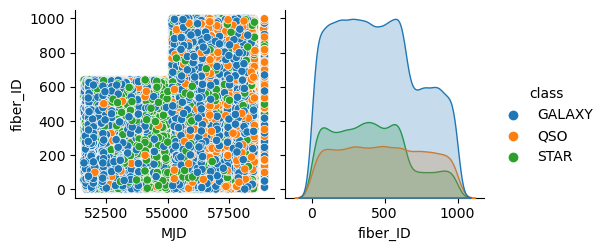

korelacja:
all_classes: 
fiber_ID       1.000000
MJD            0.256968
spec_obj_ID    0.241274
plate          0.241253
r              0.223100
g              0.220396
i              0.214782
z              0.203730
u              0.183174
redshift       0.127036
cam_col        0.121588
obj_ID         0.067159
run_ID         0.067147
alpha          0.030469
delta          0.028237
field_ID      -0.012312
Name: fiber_ID, dtype: float64
GALAXY: 
fiber_ID       1.000000
MJD            0.260715
g              0.246801
spec_obj_ID    0.239873
plate          0.239851
r              0.235781
i              0.223779
u              0.222574
z              0.214144
redshift       0.208381
cam_col        0.126233
obj_ID         0.067459
run_ID         0.067446
alpha          0.027969
delta          0.026113
field_ID      -0.024372
Name: fiber_ID, dtype: float64
QSO: 
fiber_ID       1.000000
MJD            0.152137
spec_obj_ID    0.134279
plate          0.134255
r              0.106595
i         

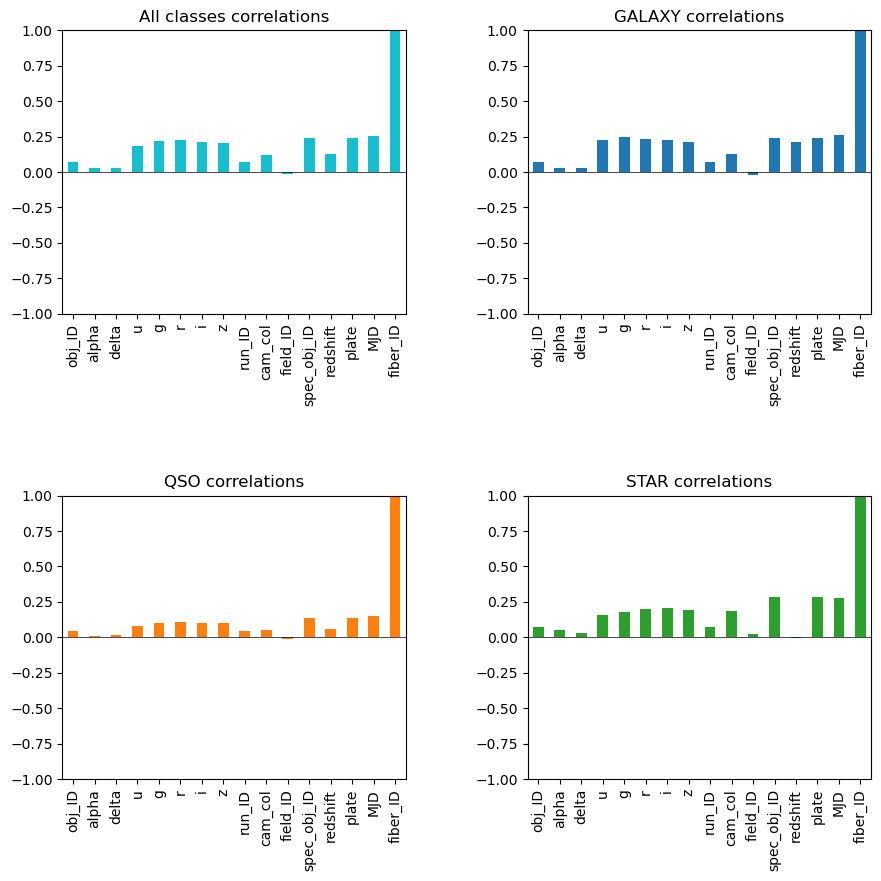

In [26]:
standard_correlation_visualisation('fiber_ID', point_limit)